In [1]:
from __future__ import print_function
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD
from keras.utils import np_utils

Using TensorFlow backend.


In [2]:
from keras.layers.core import Dropout

In [3]:
from keras.optimizers import Adam

In [25]:
import matplotlib.pyplot as plt

In [4]:
NB_EPOCH = 200
BATCH_SIZE = 128
VERBOSE = 1
NB_CLASSES = 10
OPTIMIZER = Adam()#SGD();
N_HIDDEN = 128
VALIDATION_SPLIT = 0.2
DROPOUT = 0.3

In [5]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [6]:
import pprint

In [7]:
RESHAPED = 784 #X_rain은 60000개의 행으로 구성되고 28*28개의 값을 가진다.

In [8]:
X_train.shape

(60000, 28, 28)

In [9]:
X_train = X_train.reshape(60000, RESHAPED) #28*28이미지를 784로 변환
X_test = X_test.reshape(10000, RESHAPED)
X_train = X_train.astype('float32') #이미지의 dtype변환
X_test = X_test.astype('float32')

In [10]:
X_train.shape

(60000, 784)

In [11]:
Y_test #class

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [12]:
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train_samples')
print(X_test.shape[0], 'train_samples')

60000 train_samples
10000 train_samples


In [13]:
#범주 벡터를 이진 범주 벡터 행렬로 변환
Y_train = np_utils.to_categorical(Y_train,NB_CLASSES) # 7 = [0,0,0,0,0,0,1,0,0,0]
Y_test = np_utils.to_categorical(Y_test,NB_CLASSES)

In [14]:
nn = Sequential()

In [15]:
nn.add(Dense(N_HIDDEN, input_shape=(RESHAPED,)))
nn.add(Activation('relu'))
nn.add(Dropout(DROPOUT))
nn.add(Dense(N_HIDDEN))
nn.add(Activation('relu'))
nn.add(Dropout(DROPOUT))
nn.add(Dense(NB_CLASSES))
nn.add(Activation('softmax'))
nn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
activation_1 (Activation)    (None, 128)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
activation_2 (Activation)    (None, 128)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
__________

In [16]:
nn.compile(loss='categorical_crossentropy', optimizer=OPTIMIZER, metrics=['accuracy'])

In [17]:
history = nn.fit(X_train,Y_train, batch_size=BATCH_SIZE, epochs=NB_EPOCH, verbose=VERBOSE, validation_split=VALIDATION_SPLIT)

Train on 48000 samples, validate on 12000 samples
Epoch 1/200
48000/48000 [==============================] - 4s - loss: 0.5156 - acc: 0.8422 - val_loss: 0.1929 - val_acc: 0.9431
Epoch 2/200
48000/48000 [==============================] - 3s - loss: 0.2371 - acc: 0.9292 - val_loss: 0.1520 - val_acc: 0.9556
Epoch 3/200
48000/48000 [==============================] - 3s - loss: 0.1842 - acc: 0.9452 - val_loss: 0.1193 - val_acc: 0.9648
Epoch 4/200
48000/48000 [==============================] - 3s - loss: 0.1530 - acc: 0.9541 - val_loss: 0.1042 - val_acc: 0.9687
Epoch 5/200
48000/48000 [==============================] - 3s - loss: 0.1338 - acc: 0.9591 - val_loss: 0.0980 - val_acc: 0.9727
Epoch 6/200
48000/48000 [==============================] - 3s - loss: 0.1160 - acc: 0.9639 - val_loss: 0.0935 - val_acc: 0.9723
Epoch 7/200
48000/48000 [==============================] - 3s - loss: 0.1059 - acc: 0.9683 - val_loss: 0.0865 - val_acc: 0.9745
Epoch 8/200
48000/48000 [=============================

48000/48000 [==============================] - 3s - loss: 0.0293 - acc: 0.9905 - val_loss: 0.0951 - val_acc: 0.9805
Epoch 65/200
48000/48000 [==============================] - 3s - loss: 0.0287 - acc: 0.9906 - val_loss: 0.0842 - val_acc: 0.9822
Epoch 66/200
48000/48000 [==============================] - 3s - loss: 0.0246 - acc: 0.9917 - val_loss: 0.0980 - val_acc: 0.9802
Epoch 67/200
48000/48000 [==============================] - 3s - loss: 0.0274 - acc: 0.9909 - val_loss: 0.0872 - val_acc: 0.9810
Epoch 68/200
48000/48000 [==============================] - 3s - loss: 0.0284 - acc: 0.9906 - val_loss: 0.0930 - val_acc: 0.9815
Epoch 69/200
48000/48000 [==============================] - 3s - loss: 0.0269 - acc: 0.9911 - val_loss: 0.0925 - val_acc: 0.9818
Epoch 70/200
48000/48000 [==============================] - 3s - loss: 0.0261 - acc: 0.9918 - val_loss: 0.1003 - val_acc: 0.9807
Epoch 71/200
48000/48000 [==============================] - 3s - loss: 0.0272 - acc: 0.9908 - val_loss: 0.0943

48000/48000 [==============================] - 3s - loss: 0.0184 - acc: 0.9940 - val_loss: 0.1020 - val_acc: 0.9818
Epoch 128/200
48000/48000 [==============================] - 2s - loss: 0.0197 - acc: 0.9939 - val_loss: 0.1034 - val_acc: 0.9802
Epoch 129/200
48000/48000 [==============================] - 2s - loss: 0.0202 - acc: 0.9934 - val_loss: 0.1046 - val_acc: 0.9798
Epoch 130/200
48000/48000 [==============================] - 2s - loss: 0.0204 - acc: 0.9935 - val_loss: 0.1058 - val_acc: 0.9804
Epoch 131/200
48000/48000 [==============================] - 3s - loss: 0.0213 - acc: 0.9936 - val_loss: 0.1024 - val_acc: 0.9800
Epoch 132/200
48000/48000 [==============================] - 3s - loss: 0.0204 - acc: 0.9931 - val_loss: 0.1007 - val_acc: 0.9817
Epoch 133/200
48000/48000 [==============================] - 3s - loss: 0.0198 - acc: 0.9935 - val_loss: 0.1036 - val_acc: 0.9808
Epoch 134/200
48000/48000 [==============================] - 2s - loss: 0.0197 - acc: 0.9935 - val_loss:

48000/48000 [==============================] - 2s - loss: 0.0175 - acc: 0.9948 - val_loss: 0.1115 - val_acc: 0.9802
Epoch 191/200
48000/48000 [==============================] - 2s - loss: 0.0161 - acc: 0.9945 - val_loss: 0.1154 - val_acc: 0.9807
Epoch 192/200
48000/48000 [==============================] - 2s - loss: 0.0164 - acc: 0.9949 - val_loss: 0.1212 - val_acc: 0.9773
Epoch 193/200
48000/48000 [==============================] - 3s - loss: 0.0175 - acc: 0.9945 - val_loss: 0.1127 - val_acc: 0.9800
Epoch 194/200
48000/48000 [==============================] - 3s - loss: 0.0168 - acc: 0.9948 - val_loss: 0.1089 - val_acc: 0.9803
Epoch 195/200
48000/48000 [==============================] - 3s - loss: 0.0196 - acc: 0.9943 - val_loss: 0.1116 - val_acc: 0.9808
Epoch 196/200
48000/48000 [==============================] - 2s - loss: 0.0172 - acc: 0.9946 - val_loss: 0.1104 - val_acc: 0.9806
Epoch 197/200
48000/48000 [==============================] - 3s - loss: 0.0171 - acc: 0.9945 - val_loss:

In [18]:
Y_train.shape, X_train.shape

((60000, 10), (60000, 784))

In [19]:
score = nn.evaluate(X_test, Y_test, verbose=VERBOSE)

 9536/10000 [===========================>..] - ETA: 0s

In [22]:
print("\nTest score : ",score[0])
print("Test accuracy : ",score[1])


Test score :  0.124331078761
Test accuracy :  0.9786


In [23]:
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


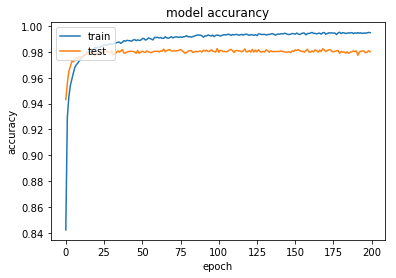

In [30]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accurancy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
fig = plt.gcf() #show 전에 해야한다.
plt.show()

In [31]:
fig.savefig('./save/plt.png')